# Statistics
***Detailed code***

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
from typing import List
import math

# from scratch.linear_algebra import dot

Vector=List[float]
%matplotlib inline

In [15]:
number_friends =  [100,20,50,40,54,10,25,89,21,54,32,71,95,2,14,32,35,32,85,32,8,21,68,89,
                  74,68,65,74,65,8,87,98,45,35,87,85,74,65,74,65,84,12,68,58,75,55,35,45,25,10]
minutes = [54,7,98,15,65,78,68,87,65,48,98,45,21,67,68,45,15,35,48,35,25,95,15,48,24,65,54,35,46,
          57,65,45,65,54,54,57,98,59,12,20,65,87,66,55,44,99,20,10,100,65]
len(minutes)

50

Text(0.5, 1.0, 'Histogram of friend counts')

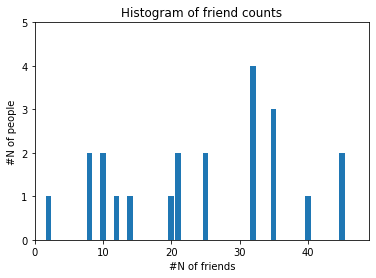

In [3]:
friend_counts = Counter(number_friends)
xs = range(49)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 49, 0, 5])
plt.ylabel("#N of people")
plt.xlabel("#N of friends")
plt.title("Histogram of friend counts")

## Central Tendencie
- Mean
- Median
- Quantile
- Mode

In [4]:
#mean
def mean(xs:List[float]) ->float:
    return sum(xs) / len(xs)

In [5]:
#median
def median_odd(xs :List[float]) -> float:
    return sorted(xs)[len(xs) // 2]

def median_even(xs:List[float]) -> float:
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint -1 ] + sorted_xs[hi_midpoint])

def median(xs: List[float]) -> float:
    return median_even(xs) if len(xs) % 2 == 0 else median_odd(xs)

In [6]:
#quantile
def quantile(xs: List[float], p: float) -> float:
    percentile = int(p * len(xs))
    return sorted(xs)[percentile]

In [7]:
#mode
def mode(xs:List[float]) -> float:
    counting = Counter(xs)
    max_counter = max(counting.values())
    return [x for x, y in counting.items() if y == max_counter]

***Dispersion***

In [8]:
def dot(v:Vector, w:Vector)-> Vector:
    assert len(v) == len(w)
    return sum(v1 * w1 for v1, w1 in zip(v,w))

def sum_of_squares(v:Vector):
    return dot(v,v)

In [9]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

In [10]:
def de_mean(xs:List[float]) -> float:
    xs_mean = mean(xs)
    return [ i - xs_mean for i in xs]

In [11]:
def variance(xs: List[float]) -> float:
    n = len(xs)
    deviation = de_mean(xs)
    return sum_of_squares(deviation) / (n-1)

def std_deviation(xs: List[float]) -> float:
    return math.sqrt(variance(xs))

In [12]:
def interquartile_range(xs: List[float]) -> float:
    return quantile(xs, 0.75) - quantile(xs, 0.25)

***Correlation***

* covariance formula
<img src= "covariance.png"  width = "305px"/>
* correlation formula
<img src= "correaltion.png" width = "305px"/>


In [16]:
def covariance(xs: List[float], ys: List[float]) -> List[float]:
    
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) -1)

def correlation(xs: List[float], ys: List[float]) -> float:
    std_xs = std_deviation(xs)
    std_ys = std_deviation(ys)
    
    if std_xs > 0 and std_ys > 0:
        return covariance(xs, ys) / std_xs / std_ys
    else:
        return 0